In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, PCA
from surprise import SVD, Reader, Dataset
from surprise.dump import dump, load
from scipy.sparse import csr_matrix

In [2]:
%%time
netflix_df = pd.read_csv('data/data.csv')

CPU times: user 24.9 s, sys: 3.8 s, total: 28.7 s
Wall time: 28.7 s


## Plot the most popular movies

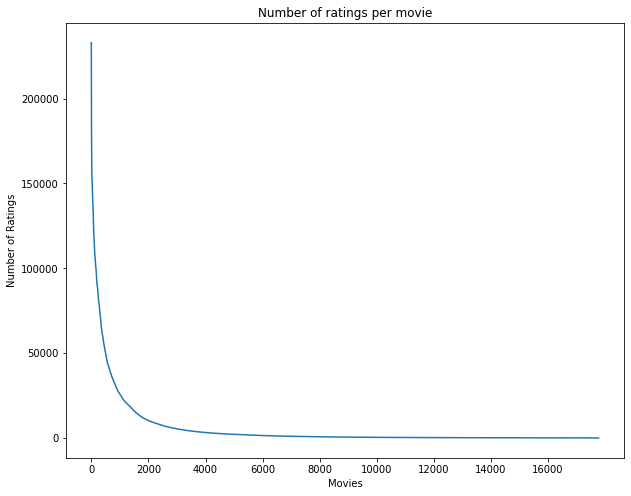

In [3]:
ratings_per_movie = netflix_df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

# plt.figure(figsize=(10,8))
plt.title('Number of ratings per movie')
plt.ylabel('Number of Ratings')
plt.xlabel('Movies')
plt.xticks(ticks=np.arange(0, len(ratings_per_movie), step=2000))
plt.plot(ratings_per_movie.values)
plt.show()

## Plot most active users


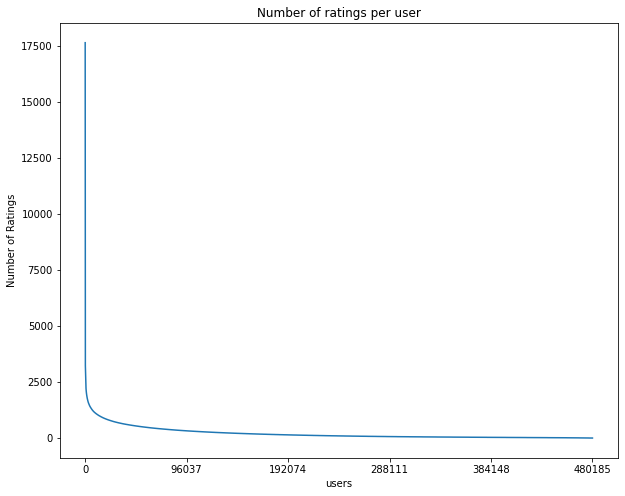

In [4]:
ratings_per_user = netflix_df.groupby(by='user')['rating'].count().sort_values(ascending=False)

# plt.figure(figsize=(10,8))
plt.title('Number of ratings per user')
plt.ylabel('Number of Ratings')
plt.xlabel('users')
plt.xticks(ticks=np.arange(0, len(ratings_per_user), step=int(len(ratings_per_user)/5)))
plt.plot(ratings_per_user.values)
plt.show()

## Truncated SVD
Investigate how much information is stored in each component

In [5]:
## Make the sparse matrix first
netflix_matrix = csr_matrix((netflix_df.rating, (netflix_df.movie, netflix_df.user)))

In [6]:
%%time
svd = TruncatedSVD(n_components=1000, random_state=0)
svd_result = svd.fit_transform(netflix_matrix)

CPU times: user 4h 7min, sys: 1h 53min 3s, total: 6h 3s
Wall time: 38min 15s


/thayerfs/home/f0031b9/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


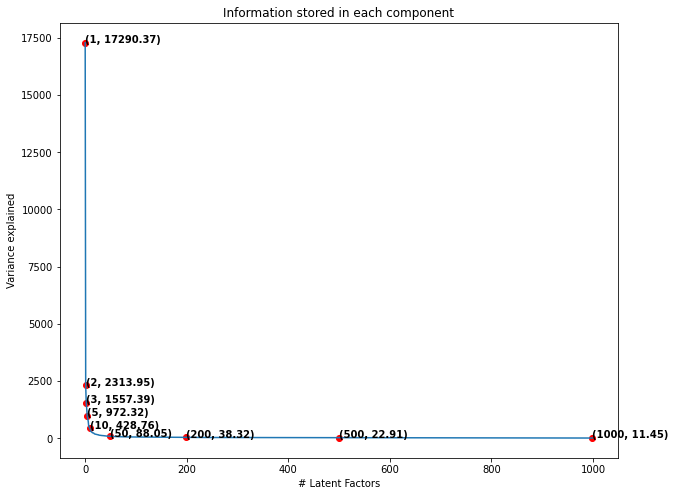

In [7]:
explained_variance = svd.explained_variance_

indices = [1, 2, 3, 5, 10, 50, 200, 500, 1000]
plot_indices = np.subtract(indices, 1)
# plt.figure(figsize=(10,8))
plt.scatter(plot_indices, explained_variance[plot_indices], color='red')
for i in indices:
    plt.annotate(s ="({}, {})".format(i,  np.round(explained_variance[i-1], 2)), xy=(i-1, explained_variance[i-1]), fontweight='bold')
plt.title('Information stored in each component')
plt.xlabel('# Latent Factors')
plt.ylabel('Variance explained')
plt.plot(explained_variance)
plt.show()

/thayerfs/home/f0031b9/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


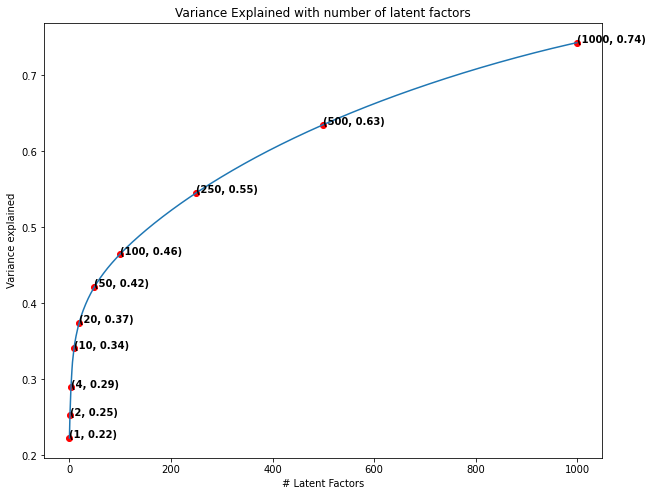

In [8]:
variance_per_factor = np.cumsum(svd.explained_variance_ratio_)

indices = [1, 2, 4, 10, 20, 50, 100, 250, 500, 1000]
plot_indices = np.subtract(indices, 1)
# plt.figure(figsize=(10,8))
plt.scatter(plot_indices, variance_per_factor[plot_indices], color='red')
for i in indices:
    plt.annotate(s ="({}, {})".format(i,  np.round(variance_per_factor[i-1], 2)), xy=(i-1, variance_per_factor[i-1]), fontweight='bold')
plt.title('Variance Explained with number of latent factors')
plt.xlabel('# Latent Factors')
plt.ylabel('Variance explained')
plt.plot(variance_per_factor)
plt.show()

/thayerfs/home/f0031b9/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if __name__ == '__main__':


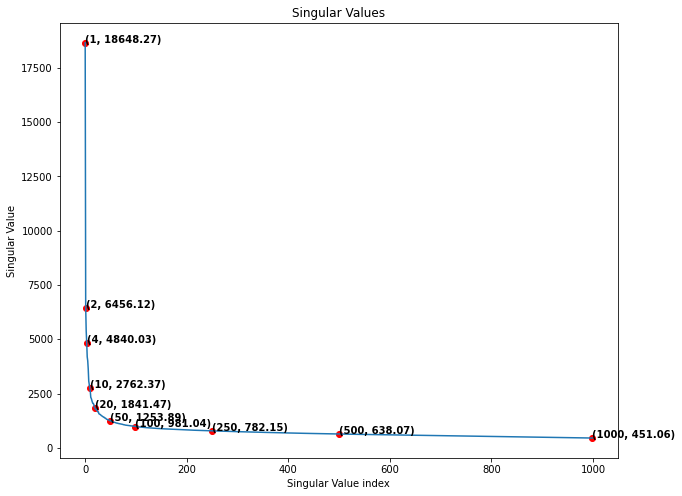

In [11]:
singular_values = svd.singular_values_

# plt.figure(figsize=(10,8))

indices = [1, 2, 4, 10, 20, 50, 100, 250, 500, 1000]
plot_indices = np.subtract(indices, 1)
plt.scatter(plot_indices, singular_values[plot_indices], color='red')
for i in indices:
    plt.annotate(s ="({}, {})".format(i,  np.round(singular_values[i-1], 2)), xy=(i-1, singular_values[i-1]), fontweight='bold')
plt.title('Singular Values')
plt.xlabel('Singular Value index')
plt.ylabel('Singular Value')
plt.plot(singular_values)
plt.show()

## Surprise
Let's see what we can get from surprise

In [9]:
model = load('models/svd_model.pickle')[1]

## Numpy or Scipy SVD
The data is too large for Numpy or Scipy